In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

import arff

In [5]:
! ls -la ../Data/raw

total 1000
drwxr-xr-x   6 rurlus  staff     192 Apr 13 18:30 .
drwxr-xr-x   6 rurlus  staff     192 Apr 13 18:29 ..
-rw-r--r--@  1 rurlus  staff    6148 Apr 13 18:30 .DS_Store
-rw-r--r--@  1 rurlus  staff  338195 Apr 13 15:45 PCard Transactions 15-16.csv
-rw-r--r--@  1 rurlus  staff  162265 Apr 13 15:37 credit_fruad.arff
drwx------@ 11 rurlus  staff     352 Apr 13 18:30 data_berka


## credit_fruad.arff

In [72]:
fp = open('../Data/raw/credit_fruad.arff')
ger_ccfr = arff.load(fp)

In [76]:
ger_ccfr

{'attributes': [('over_draft', ['<0', '0<=X<200', '>=200', 'no checking']),
  ('credit_usage', 'REAL'),
  ('credit_history',
   ['no credits/all paid',
    'all paid',
    'existing paid',
    'delayed previously',
    'critical/other existing credit']),
  ('purpose',
   ['new car',
    'used car',
    'furniture/equipment',
    'radio/tv',
    'domestic appliance',
    'repairs',
    'education',
    'vacation',
    'retraining',
    'business',
    'other']),
  ('current_balance', 'REAL'),
  ('Average_Credit_Balance',
   ['<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings']),
  ('employment', ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']),
  ('location', 'REAL'),
  ('personal_status',
   ['male div/sep',
    'female div/dep/mar',
    'male single',
    'male mar/wid',
    'female single']),
  ('other_parties', ['none', 'co applicant', 'guarantor']),
  ('residence_since', 'REAL'),
  ('property_magnitude',
   ['real estate', 'life insurance', 'car', 'no known property']

## Corporate CC trans. - baseline

### Quick review:

Data does not seem to carry much information value, there seems to be very little patterns in the data.
Perhaps the data can be used as a baseline for the generation of synthetic unbalance classes.

Note: The dataset is missing documentation and the columns are not all self explanatory.

In [8]:
bcc = pd.read_csv('../Data/raw/PCard Transactions 15-16.csv')
bcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
Service Area           3864 non-null object
Account Description    3864 non-null object
Creditor               3864 non-null object
Journal Date           3864 non-null object
Journal Reference      3864 non-null float64
Total                  3865 non-null object
dtypes: float64(1), object(5)
memory usage: 181.2+ KB


In [36]:
tmp = bcc['Total'].str.split(',', expand=True)
tmp.head()

,0,1
0,2,None
1,29.97,None
2,34.65,None
3,10.72,None
4,33.7,None


In [50]:
def clean_step(row):
    if not row[1]:
        return row[0]
    elif not row[0]:
        pass
    else:
        return row[0] + row[1]

In [55]:
bcc.loc[:, 'Total'] = tmp.apply(clean_step, axis=1).values

In [56]:
bcc_gb_jr = bcc.groupby('Creditor')['Journal Reference'].describe()
bcc_gb_jr.head()

,count,mean,std,min,25%,50%,75%,max
Creditor,,,,,,,,
43033820 COSTA COFFEE,1.0,5043.0,NaN,5043.0,5043.00,5043.0,5043.00,5043.0
99 PLUS DISCOUNT MART,1.0,4184.0,NaN,4184.0,4184.00,4184.0,4184.00,4184.0
99P STORES LTD,2.0,5659.5,874.691088,5041.0,5350.25,5659.5,5968.75,6278.0
A&Y LOCKSMITHS,1.0,6943.0,NaN,6943.0,6943.00,6943.0,6943.00,6943.0
AA MEDIA,1.0,5731.0,NaN,5731.0,5731.00,5731.0,5731.00,5731.0


In [18]:
bcc_gb_jr_musigma = bcc_gb_jr.loc[bcc_gb_jr['count'] > 2, ['mean', 'std']]

In [19]:
np.sum(bcc_gb_jr_musigma['std'] <= 1)

4

In [20]:
bcc_gb_jr_musigma.loc[bcc_gb_jr_musigma['std'] <= 1]

,mean,std
Creditor,,
HOMEBASE LTD,6249.0,1.0
INPP LTD,7241.0,1.0
WIX.COM,6352.0,1.0
WWW.ILXGROUP.COM,6242.0,1.0


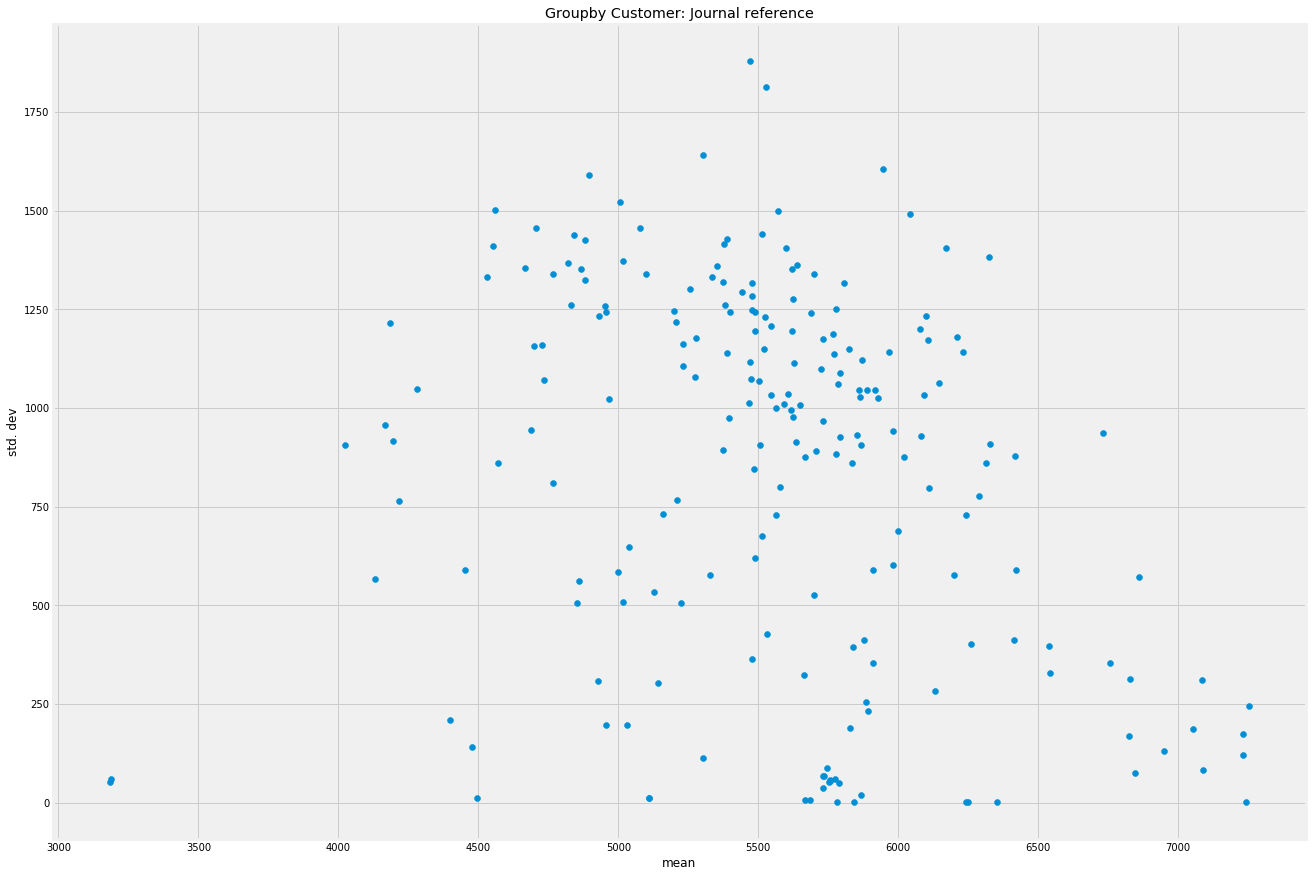

In [68]:
plt.figure(figsize=(20, 15))
plt.scatter(x=bcc_gb_jr_musigma['mean'], y=bcc_gb_jr_musigma['std'])
plt.xlabel('mean');
plt.ylabel('std. dev');
plt.title('Groupby Customer: Journal reference');

In [57]:
bcc_gb_tot = bcc.groupby('Creditor')['Total'].describe()
bcc_gb_tot.head()

,count,unique,top,freq
Creditor,,,,
43033820 COSTA COFFEE,1,1,2,1
99 PLUS DISCOUNT MART,1,1,29.97,1
99P STORES LTD,2,2,10.72,1
A&Y LOCKSMITHS,1,1,5.83,1
AA MEDIA,1,1,480,1


In [58]:
bcc_gb_tot_musigma = bcc_gb_jr.loc[bcc_gb_jr['count'] > 2, ['mean', 'std']]

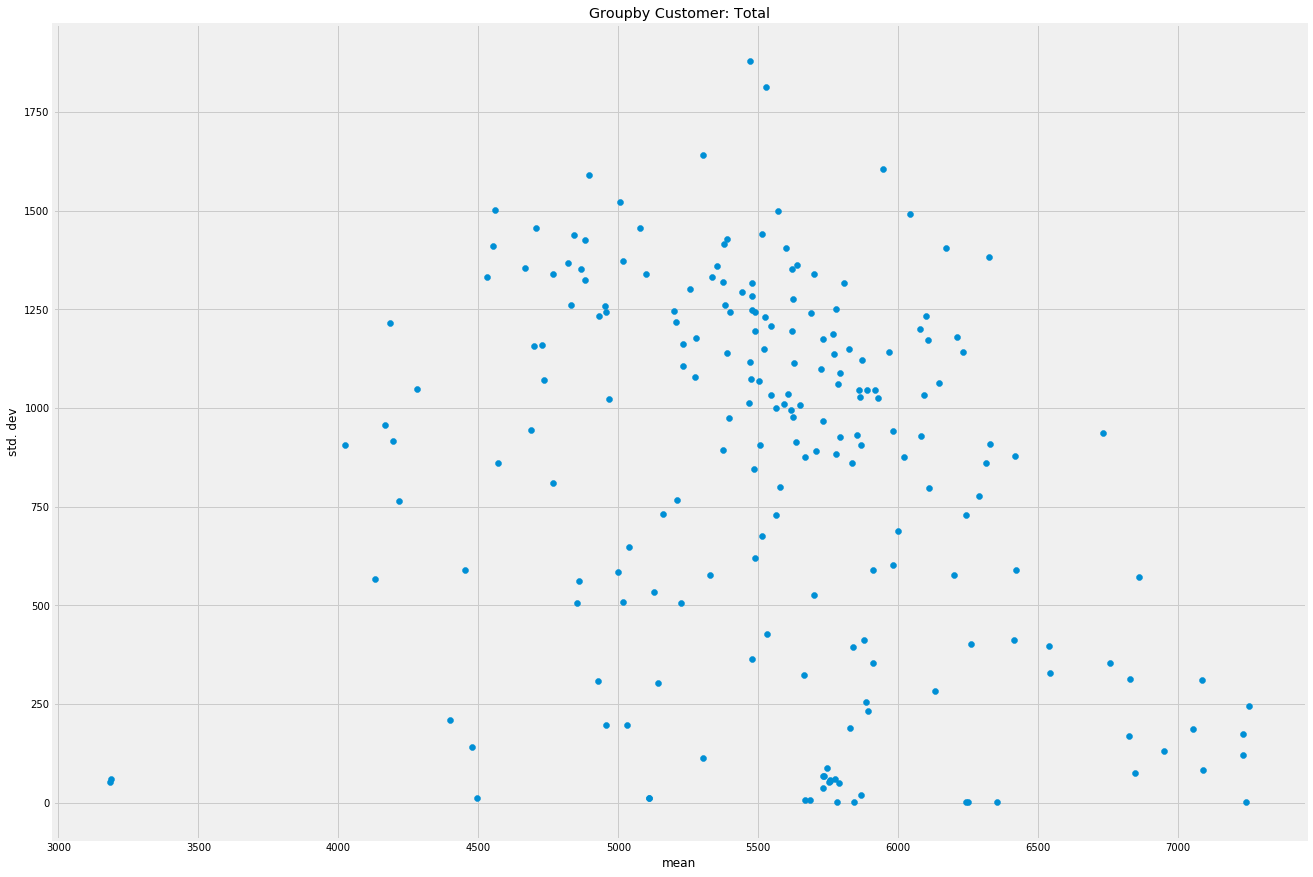

In [67]:
plt.figure(figsize=(20, 15))
plt.scatter(x=bcc_gb_tot_musigma['mean'], y=bcc_gb_tot_musigma['std'])
plt.xlabel('mean');
plt.ylabel('std. dev');
plt.title('Groupby Customer: Total');